In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap

%matplotlib inline

/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Read obs data from BGOS
INDIR='/home/datawork-lops-drakkarcom/DATA-REFERENCE/FOR-MONITORING/OCEAN/'
ds_BGOS=xr.open_dataset(INDIR+'Mean_profiles_BGOSmoorings.nc')

In [3]:
ds_BGOS

<xarray.Dataset>
Dimensions:  (Zint: 196, dtA: 773, dtB: 977, dtC: 644, dtD: 943)
Coordinates:
  * Zint     (Zint) uint16 50 60 70 80 90 100 ... 1950 1960 1970 1980 1990 2000
  * dtA      (dtA) datetime64[ns] 2003-08-15 2003-08-16 ... 2011-07-28
  * dtB      (dtB) datetime64[ns] 2003-08-24 2003-08-25 ... 2010-09-29
  * dtC      (dtC) datetime64[ns] 2003-08-27 2003-08-28 ... 2007-08-29
  * dtD      (dtD) datetime64[ns] 2005-08-29 2005-08-30 ... 2011-08-10
Data variables:
    VelA     (Zint, dtA) float64 ...
    UA       (Zint, dtA) float64 ...
    VA       (Zint, dtA) float64 ...
    TA       (Zint, dtA) float64 ...
    SA       (Zint, dtA) float64 ...
    N2A      (Zint, dtA) float64 ...
    RHOA     (Zint, dtA) float64 ...
    VelB     (Zint, dtB) float64 ...
    UB       (Zint, dtB) float64 ...
    VB       (Zint, dtB) float64 ...
    TB       (Zint, dtB) float64 ...
    SB       (Zint, dtB) float64 ...
    N2B      (Zint, dtB) float64 ...
    RHOB     (Zint, dtB) float64 ...
    Vel

In [98]:
#if year >= pd.Timestamp(ds_BGOS['dtB'].min().values).year & year <= pd.Timestamp(ds_BGOS['dtB'].min().values).year : 
#    print('yes ')

yes 


In [113]:
year=2001
CASER='TAU'
CASES='FRO'

In [114]:
INDIR1='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420'+CASER+'-MEAN/1m/'+str(year)+'/'
#INDIR1='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420'+CASER+'-MEAN/5d/'+str(year)+'/'
ds_loglU=xr.open_mfdataset(INDIR1+'*y'+str(year)+'m**gridU*.nc')
ds_loglU

ds_loglV=xr.open_mfdataset(INDIR1+'*y'+str(year)+'m**gridV*.nc')
ds_loglV


<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depthv: 75, time_counter: 12, x: 528, y: 603)
Coordinates:
    nav_lat               (y, x) float32 25.471573 25.471626 ... -1.0 -1.0
    nav_lon               (y, x) float32 -93.750336 -93.50034 ... -1.0 -1.0
  * depthv                (depthv) float32 0.50576 1.5558553 ... 5902.0576
    time_centered         (time_counter) object dask.array<shape=(12,), chunksize=(1,)>
  * time_counter          (time_counter) object 2001-01-16 12:00:00 ... 2001-12-16 12:00:00
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthv_bounds         (time_counter, depthv, axis_nbounds) float32 dask.array<shape=(12, 75, 2), chunksize=(1, 75, 2)>
    time_centered_bounds  (time_counter, axis_nbounds) float64 dask.array<shape=(12, 2), chunksize=(1, 2)>
    time_counter_bounds   (time_counter, axis_nbounds) float64 dask.array<shape=(12, 2), chunksize=(1, 2)>
    vomecrty              (time_counter, depthv, y, x) float32 dask.ar

In [115]:
INDIR2='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420'+CASES+'-MEAN/1m/'+str(year)+'/'
#INDIR2='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420'+CASES+'-MEAN/5d/'+str(year)+'/'
ds_nlinU=xr.open_mfdataset(INDIR2+'*y'+str(year)+'m**gridU*.nc')
ds_nlinU

ds_nlinV=xr.open_mfdataset(INDIR2+'*y'+str(year)+'m**gridV*.nc')
ds_nlinV


<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depthv: 75, time_counter: 12, x: 528, y: 603)
Coordinates:
    nav_lat               (y, x) float32 25.471573 25.471626 ... -1.0 -1.0
    nav_lon               (y, x) float32 -93.750336 -93.50034 ... -1.0 -1.0
  * depthv                (depthv) float32 0.50576 1.5558553 ... 5902.0576
    time_centered         (time_counter) object dask.array<shape=(12,), chunksize=(1,)>
  * time_counter          (time_counter) object 2001-01-16 12:00:00 ... 2001-12-16 12:00:00
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthv_bounds         (time_counter, depthv, axis_nbounds) float32 dask.array<shape=(12, 75, 2), chunksize=(1, 75, 2)>
    time_centered_bounds  (time_counter, axis_nbounds) float64 dask.array<shape=(12, 2), chunksize=(1, 2)>
    time_counter_bounds   (time_counter, axis_nbounds) float64 dask.array<shape=(12, 2), chunksize=(1, 2)>
    vomecrty              (time_counter, depthv, y, x) float32 dask.ar

In [117]:
ds_drg_log=xr.Dataset()
ds_drg_log['vozocrtx']=(('time_counter','depthu','y','x'),ds_loglU['vozocrtx'].values)
ds_drg_log['vomecrty']=(('time_counter','depthv','y','x'),ds_loglV['vomecrty'].values)
ds_drg_log.coords['nav_lon']=ds_loglU['nav_lon']
ds_drg_log.coords['nav_lat']=ds_loglU['nav_lat']
ds_drg_log.coords['depthu']=ds_loglU['depthu']
ds_drg_log.coords['depthv']=ds_loglV['depthv']
ds_drg_log.coords['time_counter']=pd.date_range(start=str(year)+'-01',end=str(year)+'-12',freq='MS')


ds_drg_lin=xr.Dataset()
ds_drg_lin['vozocrtx']=(('time_counter','depthu','y','x'),ds_nlinU['vozocrtx'].values)
ds_drg_lin['vomecrty']=(('time_counter','depthv','y','x'),ds_nlinV['vomecrty'].values)
ds_drg_lin.coords['nav_lon']=ds_nlinU['nav_lon']
ds_drg_lin.coords['nav_lat']=ds_nlinU['nav_lat']
ds_drg_lin.coords['depthu']=ds_nlinU['depthu']
ds_drg_lin.coords['depthv']=ds_nlinV['depthv']
ds_drg_lin.coords['time_counter']=pd.date_range(start=str(year)+'-01',end=str(year)+'-12',freq='MS')



In [118]:
ds_drg_lin['U2']=(('time_counter','depthu','y','x'),np.array(ds_drg_lin['vozocrtx'])**2)
ds_drg_lin['V2']=(('time_counter','depthu','y','x'),np.array(ds_drg_lin['vomecrty'])**2)
ds_drg_lin['speed']=(('time_counter','depthu','y','x'),np.array(ds_drg_lin['U2']+ds_drg_lin['V2'])**0.5)


ds_drg_log['U2']=(('time_counter','depthu','y','x'),np.array(ds_drg_log['vozocrtx'])**2)
ds_drg_log['V2']=(('time_counter','depthu','y','x'),np.array(ds_drg_log['vomecrty'])**2)
ds_drg_log['speed']=(('time_counter','depthu','y','x'),np.array(ds_drg_log['U2']+ds_drg_log['V2'])**0.5)


/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
/appli/conda-env/3.6/pangeo/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt


In [129]:
BGOS_A={'name':'A-Moor','lat':515,'lon':191,'vel':'VelA','UU':'UA','VV':'VA','time':'dtA'}
BGOS_B={'name':'B-Moor','lat':496,'lon':210,'vel':'VelB','UU':'UB','VV':'VB','time':'dtB'}
BGOS_C={'name':'C-Moor','lat':490,'lon':184,'vel':'VelC','UU':'UC','VV':'VC','time':'dtC'}

MOOR_2plot=BGOS_A

In [130]:
if MOOR_2plot['name'] == 'A-Moor' : 
    val_lim=0.03 # Moor-A
elif MOOR_2plot['name'] == 'B-Moor' : 
    val_lim=0.03 # Moor-B
elif MOOR_2plot['name'] == 'C-Moor' : 
    val_lim=0.01 # Moor-C

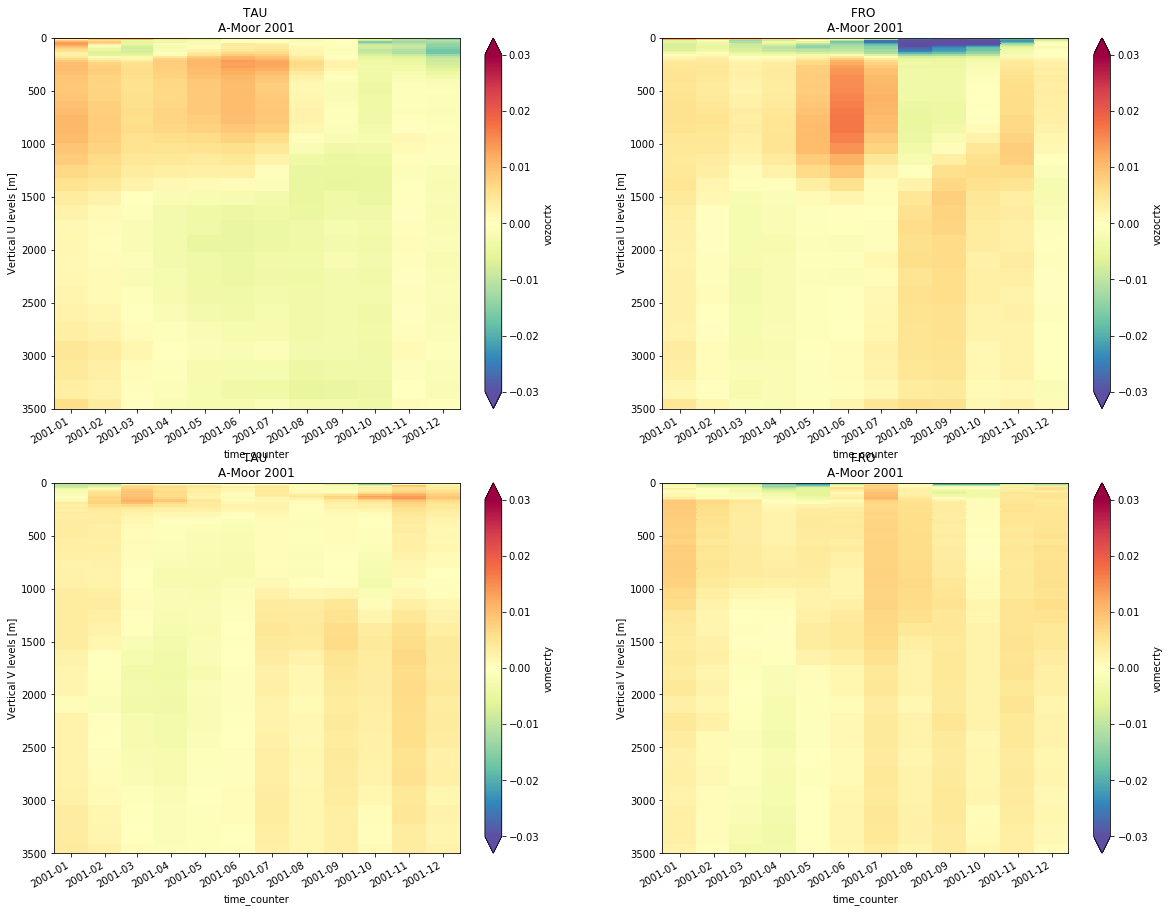

In [131]:
plt.figure(figsize=(20,15))
plt.subplot(221)
ds_drg_log['vozocrtx'].isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(label='log',cmap='Spectral_r',vmin=-1.*val_lim,vmax=val_lim,extend='both',x='time_counter')
plt.ylim([0,3500.])
plt.gca().invert_yaxis()
plt.title(CASER+' \n'+MOOR_2plot['name']+' '+str(year))

plt.subplot(222)
ds_drg_lin['vozocrtx'].isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(label='log',cmap='Spectral_r',vmin=-1.*val_lim,vmax=val_lim,extend='both',x='time_counter')
plt.ylim([0,3500.])
plt.gca().invert_yaxis()
plt.title(CASES+' \n'+MOOR_2plot['name']+' '+str(year))

plt.subplot(223)
ds_drg_log['vomecrty'].isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(label='log',cmap='Spectral_r',vmin=-1.*val_lim,vmax=val_lim,extend='both',x='time_counter')
plt.ylim([0,3500.])
plt.gca().invert_yaxis()
plt.title(CASER+' \n'+MOOR_2plot['name']+' '+str(year))

plt.subplot(224)
ds_drg_lin['vomecrty'].isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(label='log',cmap='Spectral_r',vmin=-1.*val_lim,vmax=val_lim,extend='both',x='time_counter')
plt.ylim([0,3500.])
plt.gca().invert_yaxis()
plt.title(CASES+' \n'+MOOR_2plot['name']+' '+str(year))

if False:
    plt.savefig('./FIGURES/UV_PROFILES/CREG025.L74-NEMO420'+CASER+'-'+CASES+'_drags_UV_profiles_y'+str(year)+'_BGOS-'+MOOR_2plot['name']+'.png',dpi=300)

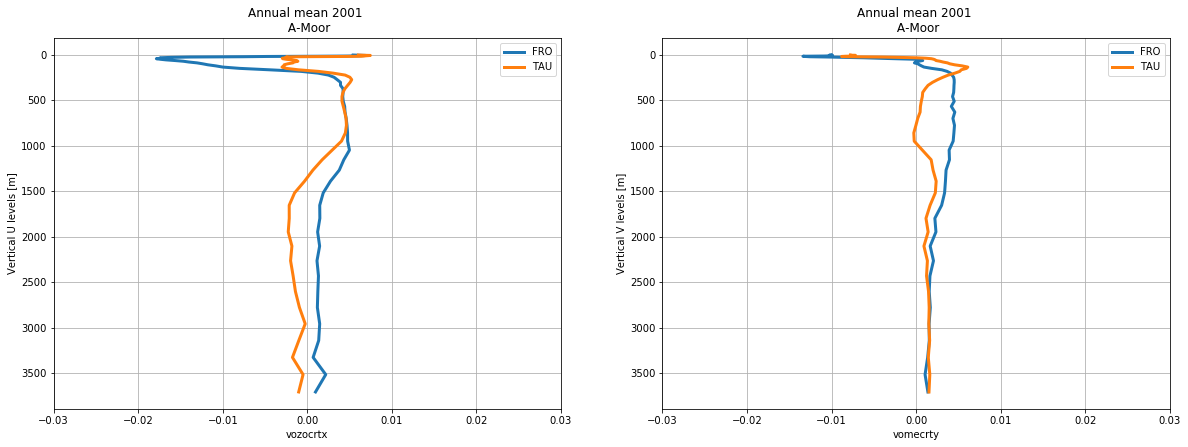

In [132]:
plt.figure(figsize=(20,15))

plt.subplot(221)
ds_drg_lin['vozocrtx'].mean(dim='time_counter').isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(linewidth=3,label=CASES,y='depthu')
ds_drg_log['vozocrtx'].mean(dim='time_counter').isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(label=CASER,linewidth=3,y='depthu')
#ds_BGOS[MOOR_2plot['UU']].sel(dtB=str(year)).mean(dim=MOOR_2plot['time']).plot(y='Zint')*1e-2
plt.title('Annual mean '+str(year)+' \n '+MOOR_2plot['name'])
plt.xlim([-1.*val_lim,val_lim])
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()


plt.subplot(222)
ds_drg_lin['vomecrty'].mean(dim='time_counter').isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(linewidth=3,label=CASES,y='depthv')
ds_drg_log['vomecrty'].mean(dim='time_counter').isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(label=CASER,linewidth=3,y='depthv')
#ds_BGOS[MOOR_2plot['VV']].sel(dtB=str(year)).mean(dim=MOOR_2plot['time']).plot(y='Zint')*1e-2
plt.title('Annual mean '+str(year)+' \n '+MOOR_2plot['name'])
plt.xlim([-1.*val_lim,val_lim])
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()


if False:
    plt.subplot(122)
    for time in set(np.arange(12)):
        ds_drg_log['vozocrtx'].isel(time_counter=time).isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(\
                            label='log',linewidth=1,alpha=0.5,color='orange',y='depthu')

    for time in set(np.arange(12)):
        ds_nlin['vozocrtx'].isel(time_counter=time).isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(\
                            label='log',linewidth=1,alpha=0.5,color='blue',y='depthu')

    ds_nlin['vozocrtx'].mean(dim='time_counter').isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(linewidth=3,y='depthu')
    ds_drg_log['vozocrtx'].mean(dim='time_counter').isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(label='log',linewidth=3,y='depthu')

    plt.xlim([-1.*val_lim,val_lim])
    plt.grid(True)
    plt.gca().invert_yaxis()


if False:
    plt.savefig('./FIGURES/UV_PROFILES/CREG025.L74-NEMO420'+CASER+'-'+CASES+'_drags_UV_Meanprofiles_y'+str(year)+'_BGOS-'+MOOR_2plot['name']+'.png',dpi=300)


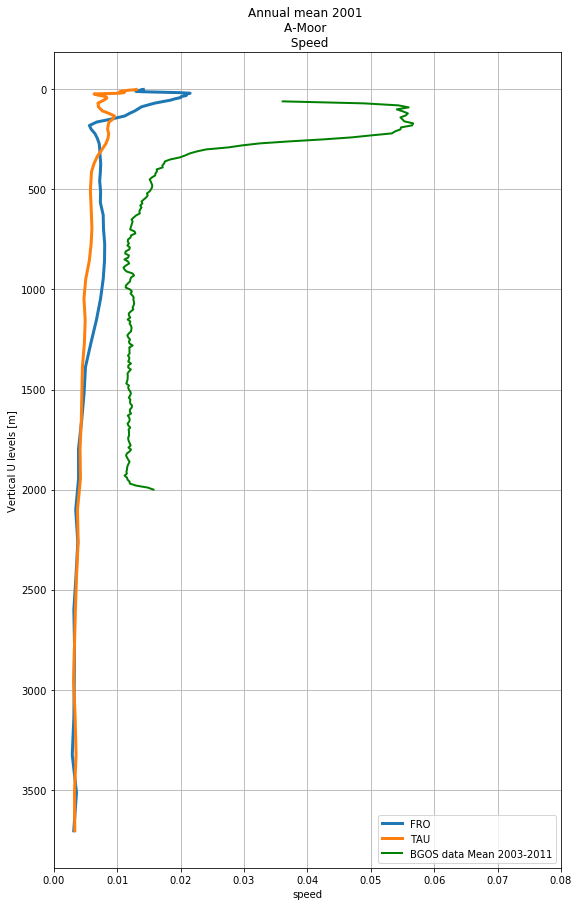

In [134]:
plt.figure(figsize=(20,15))

if MOOR_2plot['name'] == 'A-Moor':
    val_lim=0.08 # Moor-A
elif MOOR_2plot['name'] == 'B-Moor' : 
    val_lim=0.08 # Moor-B
elif MOOR_2plot['name'] == 'C-Moor' : 
    val_lim=0.04 # Moor-C

plt.subplot(121)
ds_drg_lin['speed'].mean(dim='time_counter').isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(linewidth=3,label=CASES,y='depthu')
ds_drg_log['speed'].mean(dim='time_counter').isel(x=MOOR_2plot['lon'],y=MOOR_2plot['lat']).plot(linewidth=3,label=CASER,y='depthu')

# Get the data year range  
y_min=pd.Timestamp(ds_BGOS[MOOR_2plot['time']].min().values).year ; y_max=pd.Timestamp(ds_BGOS[MOOR_2plot['time']].max().values).year

if MOOR_2plot['name'] == 'A-Moor':
    if (year >= y_min) & (year <= y_max) : 
        plt.plot(ds_BGOS[MOOR_2plot['vel']].sel(dtA=str(year)).mean(dim=MOOR_2plot['time'])*1e-2,ds_BGOS['Zint'],'g', linewidth=2, label='BGOS data')
    else :
        plt.plot(ds_BGOS[MOOR_2plot['vel']].mean(dim=MOOR_2plot['time'])*1e-2,ds_BGOS['Zint'],'g', linewidth=2, label='BGOS data Mean '+str(y_min)+'-'+str(y_max))
elif MOOR_2plot['name'] == 'B-Moor' : 
    if (year >= y_min) & (year <= y_max) : 
        plt.plot(ds_BGOS[MOOR_2plot['vel']].sel(dtB=str(year)).mean(dim=MOOR_2plot['time'])*1e-2,ds_BGOS['Zint'],'g', linewidth=2, label='BGOS data')
    else :
        plt.plot(ds_BGOS[MOOR_2plot['vel']].mean(dim=MOOR_2plot['time'])*1e-2,ds_BGOS['Zint'],'g', linewidth=2, label='BGOS data Mean '+str(y_min)+'-'+str(y_max))
elif MOOR_2plot['name'] == 'C-Moor' : 
    if (year >= y_min) & (year <= y_max) : 
        plt.plot(ds_BGOS[MOOR_2plot['vel']].sel(dtC=str(year)).mean(dim=MOOR_2plot['time'])*1e-2,ds_BGOS['Zint'],'g', linewidth=2, label='BGOS data')
    else :
        plt.plot(ds_BGOS[MOOR_2plot['vel']].mean(dim=MOOR_2plot['time'])*1e-2,ds_BGOS['Zint'],'g', linewidth=2, label='BGOS data Mean '+str(y_min)+'-'+str(y_max))    

plt.gca().invert_yaxis()
plt.title('Annual mean '+str(year)+' \n'+MOOR_2plot['name']+' \n Speed')
plt.xlim([0.,val_lim])
plt.grid(True)
plt.legend()

if True: 
    plt.savefig('./FIGURES/UV_PROFILES/CREG025.L74-NEMO420'+CASER+'-'+CASES+'_drags_Speed_Meanprofile_y'+str(year)+'_BGOS-'+MOOR_2plot['name']+'.png',dpi=300)

